In [1]:
import numpy as np 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
#Scikit-learn models
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
# Scikit-learn metrics
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
df = pd.read_csv('../input/water-potability/water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


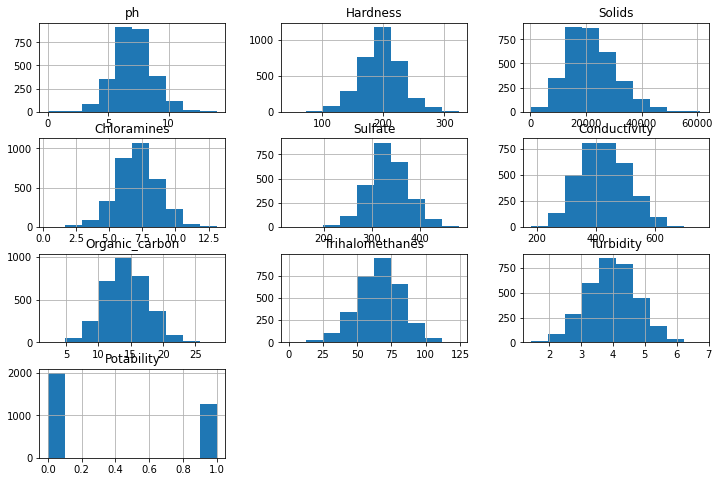

In [7]:
df.hist(figsize=(12,8));

# **Missing Values Analysis**

In [8]:
missing={"missing":df.isnull().sum()," % of missing":round(((df.isnull().sum()/df.shape[0])*100),2)}
pd.DataFrame(missing)

,missing,% of missing
ph,491,14.99
Hardness,0,0.00
Solids,0,0.00
Chloramines,0,0.00
Sulfate,781,23.84
Conductivity,0,0.00
Organic_carbon,0,0.00
Trihalomethanes,162,4.95
Turbidity,0,0.00
Potability,0,0.00


In [9]:
pH_nan_1 = df.query('Potability == 1')['ph'][df['ph'].isna()].index

df.loc[pH_nan_1,'ph'] =df.query('Potability == 1')['ph'][df['ph'].notna()].mean()

pH_nan_0 = df.query('Potability == 0')['ph'][df['ph'].isna()].index
df.loc[pH_nan_0,'ph'] = df.query('Potability == 0')['ph'][df['ph'].notna()].mean()

In [10]:
Sulfate_nan_1 = df.query('Potability == 1')['Sulfate'][df['Sulfate'].isna()].index
df.loc[Sulfate_nan_1,'Sulfate'] =df.query('Potability == 1')['Sulfate'][df['Sulfate'].notna()].mean()

Sulfate_nan_0 = df.query('Potability == 0')['Sulfate'][df['Sulfate'].isna()].index
df.loc[Sulfate_nan_0,'Sulfate'] = df.query('Potability == 0')['Sulfate'][df['Sulfate'].notna()].mean()

In [11]:
df=df.dropna(subset=["Trihalomethanes"])

In [12]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [13]:
Potability=df["Potability"].value_counts()
Potability

0    1891
1    1223
Name: Potability, dtype: int64

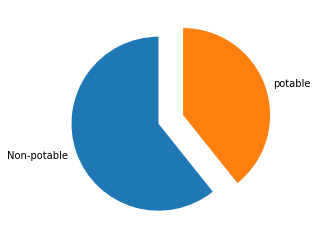

In [14]:
plt.pie(Potability,labels=["Non-potable","potable"],startangle=90,explode=[0.3,0])
plt.show()

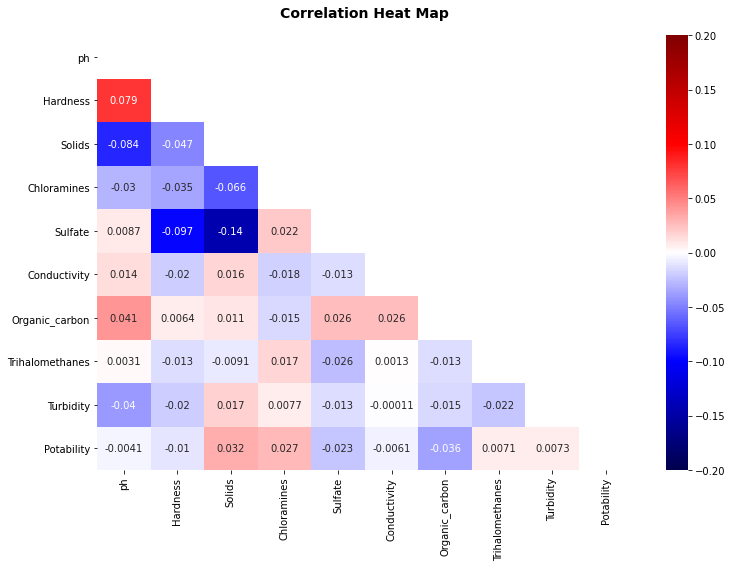

In [15]:
# Feature correlation heat map
# Get Pearson correlation values
data = df.corr()    # Pairwise correlation with a null value is ignored
# Generate heat map using seaborn
fig, ax = plt.subplots(figsize=(12,8))                          # Create grid of empty subplots using matplotlib library                      
mask = np.triu(np.ones_like(data, dtype=bool))                   # Mask correlation matrix along its line of symmetry to remove redencency and correlation of a feature with itself
sns.heatmap(data, cmap='seismic', annot=True, mask=mask, ax=ax, vmin=-0.2, vmax=0.2)    # Create heat map useing seaborn library
fig.text(0.5, 1.05, 'Correlation Heat Map', horizontalalignment='center', verticalalignment='center', fontsize=14, fontweight='bold', transform=ax.transAxes)   # Add title
sns.set_style('white')        # Remove tick marks

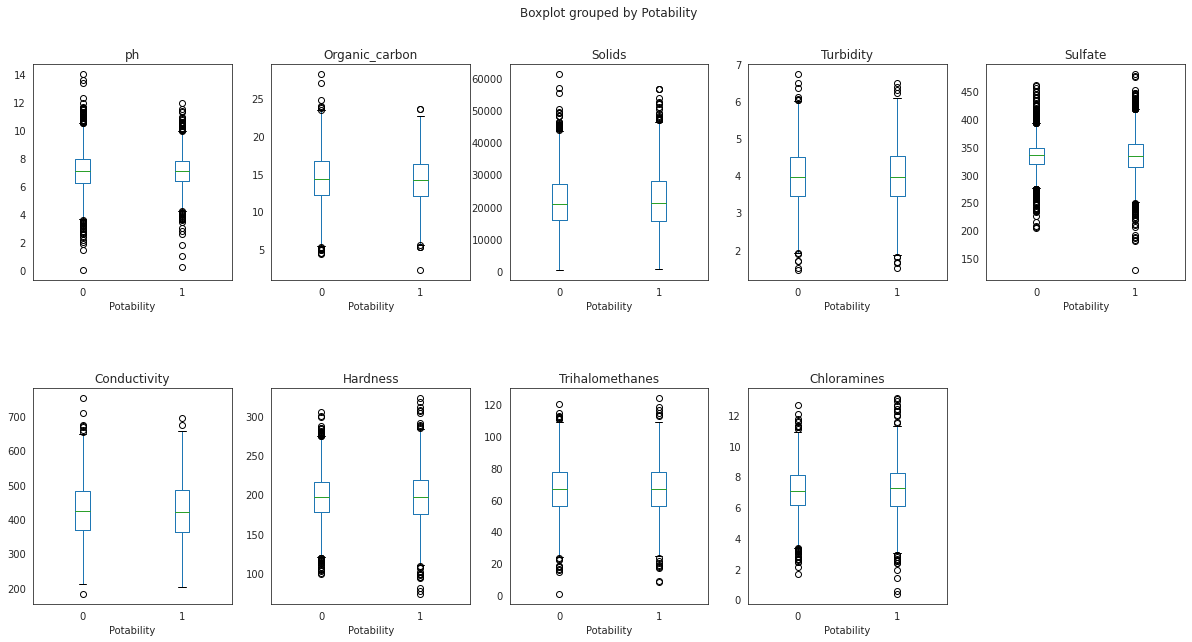

In [16]:
# Box Plots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))  # Create empty grid of subplots
fig.subplots_adjust(hspace=.5)                       # Adjust vertical/height spacing 

# Fill each subplot with the distribution of a feature separated by potability
a=0                               # Increment subplot coordinates
for feature in df.drop('Potability', axis=1):    # Iterate through features ('Potability' is a label) 
  df.boxplot(by='Potability', column=[feature], ax=axes[ a%2, a%5 ], grid=False)    # Create boxplots for each feature grouped by potable or not (df.boxplot() auto handles nan correctly). Subplot coordinates [a%2, a%5] start top left and vertically zig zag moving right.
  a+=1

axes[1,4].remove()        # Remove unnecessary subplot from 2x5 grid
plt.show()

# **train_test_split**

In [17]:
df_copy=df
x=df.drop(["Potability"],axis=1)
y=df.Potability


In [18]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [19]:
Accuracy={}

# **Logistic regresion**

In [20]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

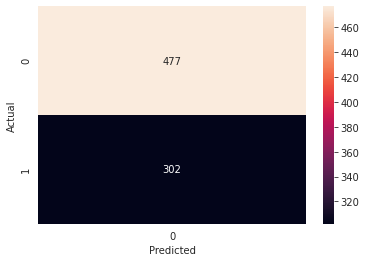

In [21]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,fmt='g')

In [22]:
Accuracy_Logistic_regresion=round((metrics.accuracy_score(y_test, y_pred)*100),2)
print('Accuracy Logistic regresion: ',Accuracy_Logistic_regresion,"%")
Accuracy["Logisticregresion"]=Accuracy_Logistic_regresion

Accuracy Logistic regresion:  61.23 %


# **SVM**

In [23]:
from sklearn import svm

In [24]:
svm_class= svm.SVC()
svm_class.fit(X_train,y_train)
y_pred=svm_class.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

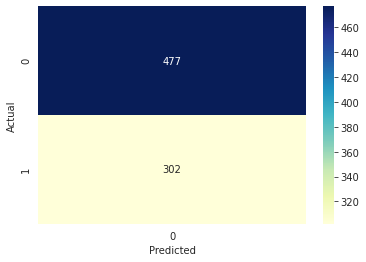

In [25]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')

In [26]:
Accuracy_Svm=round((metrics.accuracy_score(y_test, y_pred)*100),2)
print('Accuracy: ',Accuracy_Svm,"%")
Accuracy["SVC"]=Accuracy_Svm

Accuracy:  61.23 %


# **Decision Tree Classifier**

In [27]:
from sklearn import tree

In [28]:
clf=tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

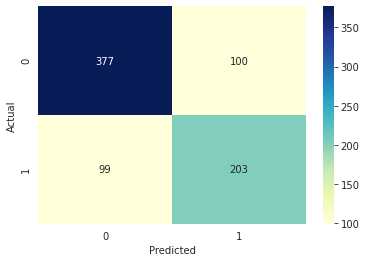

In [29]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')

In [30]:
Accuracy_Decision_Tree=round((metrics.accuracy_score(y_test, y_pred)*100),2)
print('Accuracy: ',Accuracy_Decision_Tree,"%")
Accuracy["DecisionTreeClassifier"]=Accuracy_Decision_Tree

Accuracy:  74.45 %


# **RandomForestClassifier**

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
clf= RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

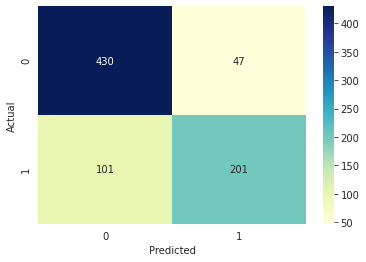

In [33]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')

In [34]:
Accuracy_RandomForestClassifier=round((accuracy_score(y_test,y_pred)*100),2)
print("Accuracy_RandomForestClassifier : ",Accuracy_RandomForestClassifier,"%")
Accuracy["RandomForestClassifier"]=Accuracy_RandomForestClassifier

Accuracy_RandomForestClassifier :  81.0 %


# **KNeighborsClassifier**

In [35]:
clf=KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

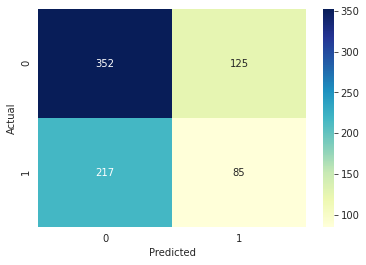

In [36]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')


In [37]:
Accuracy_KNeighborsClassifier=round((metrics.accuracy_score(y_test,y_pred)*100),2)
print("Accuracy_KNeighborsClassifier : ",Accuracy_KNeighborsClassifier,"%")
Accuracy["Accuracy_KNeighborsClassifier"]=Accuracy_KNeighborsClassifier

Accuracy_KNeighborsClassifier :  56.1 %


# **XGBClassifier**

In [38]:
import xgboost as xgb

In [39]:
xg_reg = xgb.XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

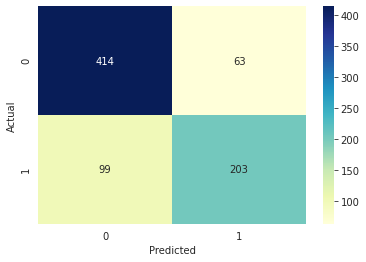

In [40]:
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')

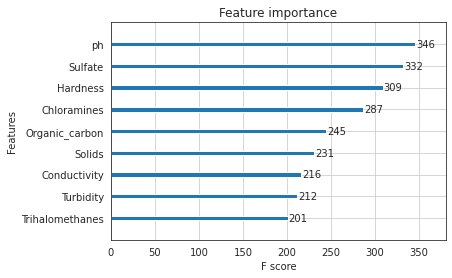

In [41]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# **All Model Building**

In [42]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [43]:
models = [  
  LogisticRegression(),
  SVC(),
  DecisionTreeClassifier(),
  XGBClassifier(eval_metric = 'logloss', use_label_encoder=False),
  AdaBoostClassifier(),
  RandomForestClassifier(),
  AdaBoostClassifier(),
  GaussianNB(),
  KNeighborsClassifier()]

model_name=["LogisticRegression","SVC","DecisionTreeClassifier",'XGBClassifier','AdaBoostClassifier',"RandomForestClassifier","AdaBoostClassifier","GaussianNB","KNeighborsClassifier"]

prints={}
for mod,name in zip(models,model_name):
  model=mod
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  acc=round((accuracy_score(y_test,y_pred)*100),2)
  prints[name]=acc

In [44]:
accuracy_all=pd.DataFrame(prints,index=[1])
accuracy_all

,LogisticRegression,SVC,DecisionTreeClassifier,XGBClassifier,AdaBoostClassifier,RandomForestClassifier,GaussianNB,KNeighborsClassifier
1,61.23,61.23,74.84,79.2,74.71,80.62,60.85,56.1


In [45]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV

In [46]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [47]:
# Create the random grid
random_grid = {"n_neighbors":[3,4,5,6,7,8,10]
               }

rf = KNeighborsClassifier()

from pprint import pprint
pprint(random_grid)
rf = KNeighborsClassifier()
grid_cv_dtm = GridSearchCV(rf, random_grid)

{'n_neighbors': [3, 4, 5, 6, 7, 8, 10]}


In [48]:
grid_cv_dtm.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 10]})

In [49]:
df = pd.DataFrame(data=grid_cv_dtm.cv_results_)
df.head(7)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004910,0.000161,0.021451,0.000138,3,{'n_neighbors': 3},0.543897,0.576017,0.524625,0.571734,0.488223,0.540899,0.032350,7
1,0.004805,0.000046,0.021825,0.000219,4,{'n_neighbors': 4},0.576017,0.599572,0.565310,0.582441,0.578158,0.580300,0.011168,4
2,0.004800,0.000062,0.021656,0.000067,5,{'n_neighbors': 5},0.565310,0.552463,0.565310,0.580300,0.539615,0.560600,0.013704,6
3,0.004769,0.000046,0.021745,0.000139,6,{'n_neighbors': 6},0.576017,0.578158,0.578158,0.584582,0.588865,0.581156,0.004807,3
4,0.004726,0.000073,0.021818,0.000131,7,{'n_neighbors': 7},0.569593,0.556745,0.573876,0.591006,0.561028,0.570450,0.011930,5
5,0.004943,0.000186,0.022882,0.000870,8,{'n_neighbors': 8},0.582441,0.578158,0.567452,0.608137,0.584582,0.584154,0.013366,2
6,0.004845,0.000039,0.022257,0.000281,10,{'n_neighbors': 10},0.576017,0.599572,0.586724,0.610278,0.608137,0.596146,0.013032,1


# **Deep Learning**

In [50]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, SGD
from tensorflow.keras.layers import Activation
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation

In [51]:
x = df_copy.drop(['Potability'], axis = 1)
y = df_copy['Potability']

In [52]:
st = StandardScaler()
x_columns= x.columns
x[x_columns] = st.fit_transform(x[x_columns])

In [53]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.003480,0.257900,-0.134481,0.111702,0.963481,1.700988,-1.176271,1.273445,-1.290536
1,-2.302400,-2.037266,-0.382094,-0.309156,0.024389,2.054036,0.271169,-0.622493,0.688131
2,0.697267,0.846257,-0.235505,1.362107,0.024389,-0.099078,0.780348,0.001472,-1.171112
3,0.846217,0.546301,0.006106,0.592150,0.641795,-0.782767,1.253122,2.098969,0.853004
4,1.376925,-0.465584,-0.456686,-0.365260,-0.651287,-0.348580,-0.820912,-2.126974,0.140442


In [54]:
x.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3.114000e+03,3.114000e+03,3.114000e+03,3.114000e+03,3.114000e+03,3.114000e+03,3.114000e+03,3.114000e+03,3.114000e+03
mean,2.166611e-16,6.815447e-17,1.975869e-16,3.112297e-16,3.445738e-16,-1.013961e-16,-5.797475e-16,2.041470e-16,-1.986565e-16
std,1.000161e+00,1.000161e+00,1.000161e+00,1.000161e+00,1.000161e+00,1.000161e+00,1.000161e+00,1.000161e+00,1.000161e+00
min,-4.845611e+00,-3.738264e+00,-2.479743e+00,-4.285829e+00,-5.661371e+00,-3.028583e+00,-3.642765e+00,-4.059895e+00,-3.237821e+00
25%,-5.514050e-01,-5.964947e-01,-7.198364e-01,-6.236567e-01,-4.657179e-01,-7.449540e-01,-6.684332e-01,-6.524542e-01,-6.731408e-01
50%,3.480034e-03,2.066250e-02,-1.231074e-01,-1.487029e-03,2.438910e-02,-5.726790e-02,-1.848497e-02,1.398630e-02,-1.220090e-02
75%,5.374422e-01,6.177003e-01,5.995403e-01,6.275081e-01,4.615061e-01,6.894922e-01,6.868617e-01,6.765336e-01,6.843334e-01
max,4.735709e+00,3.853692e+00,4.498199e+00,3.799482e+00,4.075543e+00,4.036389e+00,4.227309e+00,3.561850e+00,3.568701e+00


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [56]:
num_classes =2
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [57]:
model = models.Sequential()

model.add(layers.Dense(100, input_shape=(9,)))
model.add(Activation("relu"))


model.add(layers.Dense(100))
model.add(Activation("relu"))
model.add(Dropout(0.25))

model.add(layers.Dense(50))
model.add(Activation("relu"))
model.add(Dropout(0.25))

model.add(layers.Dense(2))
model.add(Activation("sigmoid"))

In [58]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.85,beta_2=0.9),
              metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1000      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0

In [60]:
tf.random.set_seed(0)
history = model.fit(X_train, Y_train,
          batch_size=32, epochs=200,
          verbose=2,
          validation_data=(X_test, Y_test))


Epoch 1/200
73/73 - 1s - loss: 0.6959 - accuracy: 0.5259 - val_loss: 0.6806 - val_accuracy: 0.6123
Epoch 2/200
73/73 - 0s - loss: 0.6784 - accuracy: 0.6064 - val_loss: 0.6744 - val_accuracy: 0.6110
Epoch 3/200
73/73 - 0s - loss: 0.6770 - accuracy: 0.6034 - val_loss: 0.6707 - val_accuracy: 0.6123
Epoch 4/200
73/73 - 0s - loss: 0.6678 - accuracy: 0.6103 - val_loss: 0.6679 - val_accuracy: 0.6110
Epoch 5/200
73/73 - 0s - loss: 0.6651 - accuracy: 0.6030 - val_loss: 0.6654 - val_accuracy: 0.6110
Epoch 6/200
73/73 - 0s - loss: 0.6649 - accuracy: 0.6099 - val_loss: 0.6627 - val_accuracy: 0.6123
Epoch 7/200
73/73 - 0s - loss: 0.6616 - accuracy: 0.6081 - val_loss: 0.6610 - val_accuracy: 0.6175
Epoch 8/200
73/73 - 0s - loss: 0.6574 - accuracy: 0.6240 - val_loss: 0.6584 - val_accuracy: 0.6239
Epoch 9/200
73/73 - 0s - loss: 0.6526 - accuracy: 0.6240 - val_loss: 0.6558 - val_accuracy: 0.6264
Epoch 10/200
73/73 - 0s - loss: 0.6496 - accuracy: 0.6330 - val_loss: 0.6540 - val_accuracy: 0.6329
Epoch 11/

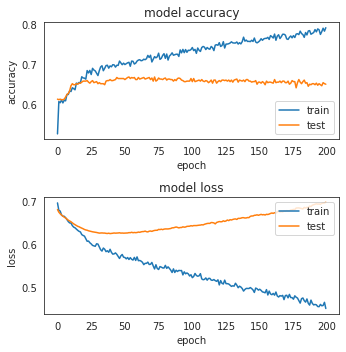

In [61]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()